In [13]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import models ,layers, preprocessing
import cv2 as cv
import PIL
from PIL import Image
import os
import glob
import io

# Image conversion to numerical array

Fetching dataset into the program

In [14]:
img_dir = "../data/"
no_tumor_images = os.listdir(img_dir + "no/")
yes_tumor_images = os.listdir(img_dir + "yes/")

In [65]:
dataset = []
labels = []

In [66]:
for image_name in no_tumor_images:
    image = cv.imread(img_dir + 'no/'+image_name)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((128,128))
    dataset.append(np.array(image))
    labels.append(0)

In [67]:
for image_name in yes_tumor_images:
    image = cv.imread(img_dir + 'yes/'+ image_name)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((128,128))
    dataset.append(np.array(image))
    labels.append(1)

In [74]:
data_1 = np.asanyarray(dataset)
l = np.asarray(labels)

In [75]:
data_1.shape , l.shape, data_1.ndim, l.ndim

((3000, 128, 128, 3), (3000,), 4, 1)

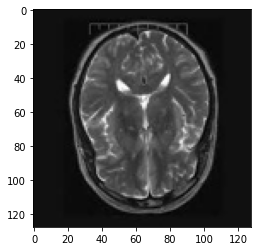

In [76]:
plt.imshow(data_1[3])

# Model training

In [77]:
model = models.Sequential()

model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(512,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(1024,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

# model.add(layers.Conv2D(64,(3,3),activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))

# model.add(layers.Conv2D(64,(3,3),activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))

# model.add(layers.Conv2D(64,(3,3),activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))

# model.add(layers.Conv2D(64,(3,3),activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))

# model.add(layers.Conv2D(64,(3,3),activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))

# model.add(layers.Conv2D(64,(3,3),activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))

# model.add(layers.Conv2D(64,(3,3),activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))

model.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_73 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_62 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_74 (Conv2D)          (None, 61, 61, 128)       73856     
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 30, 30, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_75 (Conv2D)          (None, 28, 28, 256)       295168    
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 14, 14, 256)    

## Adding a dense layer

In [78]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))


model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_73 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_62 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_74 (Conv2D)          (None, 61, 61, 128)       73856     
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 30, 30, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_75 (Conv2D)          (None, 28, 28, 256)       295168    
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 14, 14, 256)    

In [79]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(data_1, l,epochs=10)

Epoch 1/10
94/94 [==============================] - 114s 1s/step - loss: 2.7667 - accuracy: 0.7593
Epoch 2/10
94/94 [==============================] - 117s 1s/step - loss: 0.2783 - accuracy: 0.8890
Epoch 3/10
94/94 [==============================] - 117s 1s/step - loss: 0.1281 - accuracy: 0.9567
Epoch 4/10
94/94 [==============================] - 117s 1s/step - loss: 0.1120 - accuracy: 0.9567
Epoch 5/10
94/94 [==============================] - 116s 1s/step - loss: 0.0865 - accuracy: 0.9673
Epoch 6/10
94/94 [==============================] - 116s 1s/step - loss: 0.0680 - accuracy: 0.9787
Epoch 7/10
94/94 [==============================] - 118s 1s/step - loss: 0.0600 - accuracy: 0.9783
Epoch 8/10
94/94 [==============================] - 116s 1s/step - loss: 0.0193 - accuracy: 0.9940
Epoch 9/10
94/94 [==============================] - 119s 1s/step - loss: 0.0118 - accuracy: 0.9967
Epoch 10/10
94/94 [==============================] - 120s 1s/step - loss: 0.0184 - accuracy: 0.9950


In [82]:
pred_set=[]
pred_images=os.listdir(img_dir +'pred/')
for image_name in pred_images:
    image=cv.imread(img_dir +'pred/'+ image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((128,128))
    pred_set.append(np.array(image))
pred=np.asarray(pred_set)

In [83]:
x=model.predict(pred)
max=np.argmax(x,axis=1)
max

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1])

0


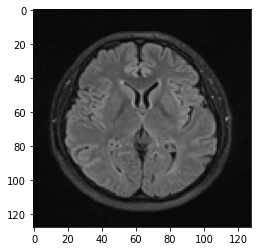

In [84]:
plt.imshow(pred[1])
print(max[1])

0


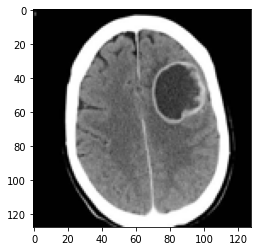

In [85]:
plt.imshow(pred[4])
print(max[4])

0


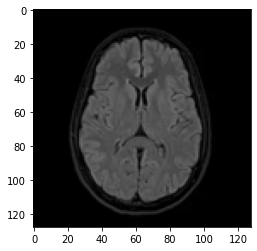

In [86]:
plt.imshow(pred[2])
print(max[2])

1


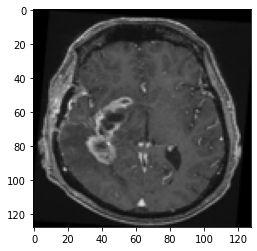

In [87]:
plt.imshow(pred[5])
print(max[5])